In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df1 = pd.read_csv('listings.csv')

In [4]:
print(df1.shape)
df1.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

# Data Preprocessing 

In [5]:
df1.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [6]:
dfprice = df1['price']

prices=[]

for p in dfprice:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
df1['price'] = prices

df1 = df1[df1.bedrooms > 0]
df1 = df1[df1.bathrooms > 0]
df1 = df1[df1.accommodates > 0]
df1 = df1[df1.price > 0]
df1 = df1[df1.beds > 0]
df1 = df1[df1.review_scores_rating > 0]
df1 = df1[df1.reviews_per_month > 0]
df1.fillna(0, inplace=True)


df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,0,0,0,0,0,https://a1.muscache.com/ac/pictures/67560560/c...,0,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0.0,85.0,0,0,0,0,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,0.0,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.0,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern h

# Feature Engineering of Listing

## Listing with Room Type

Text(0.5, 0, 'Room type')

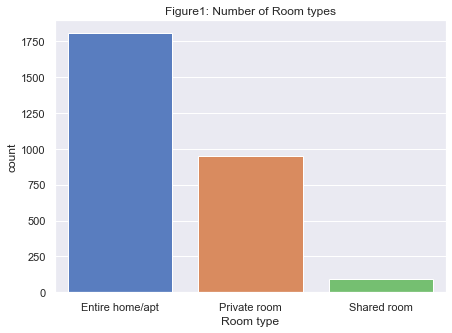

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x = df1["room_type"], palette="muted")
plt.title("Figure1: Number of Room types")
plt.xlabel("Room type")

## Listing with Property Type

Text(0.5, 0, 'Property type')

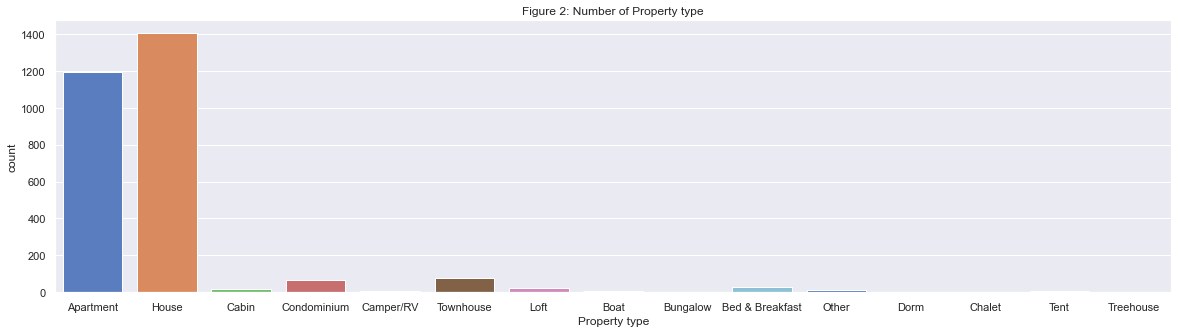

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(x = df1["property_type"], palette="muted")
plt.title("Figure 2: Number of Property type")
plt.xlabel("Property type")

In [9]:
room_price = df1.groupby(['property_type','room_type']).price.mean()
room_price = room_price.reset_index()
room_price = room_price.sort_values('price',ascending = [0])
room_price.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


## Listing with Number of Bedrooms


Text(0.5, 1.0, 'Figure 3: Relationship between bedrooms and price')

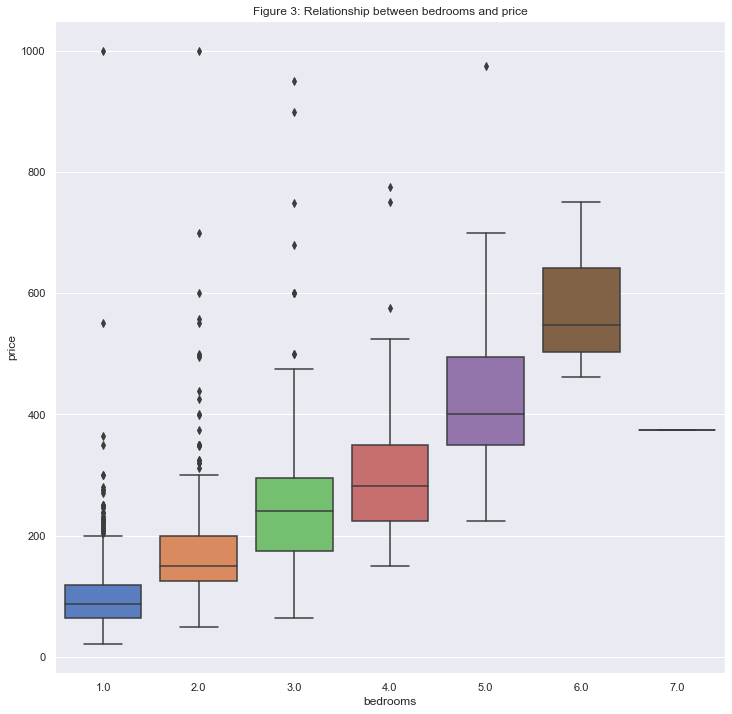

In [10]:
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=df1[['bedrooms', 'price']], palette="muted")
plt.title("Figure 3: Relationship between bedrooms and price")

In [11]:
df1["bedrooms"].value_counts()

1.0    1999
2.0     532
3.0     236
4.0      52
5.0      17
6.0       6
7.0       1
Name: bedrooms, dtype: int64

## Listing of the relationship between a specific amenity and greater pricing

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = df1[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

[nltk_data] Downloading package punkt to /Users/owen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/owen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


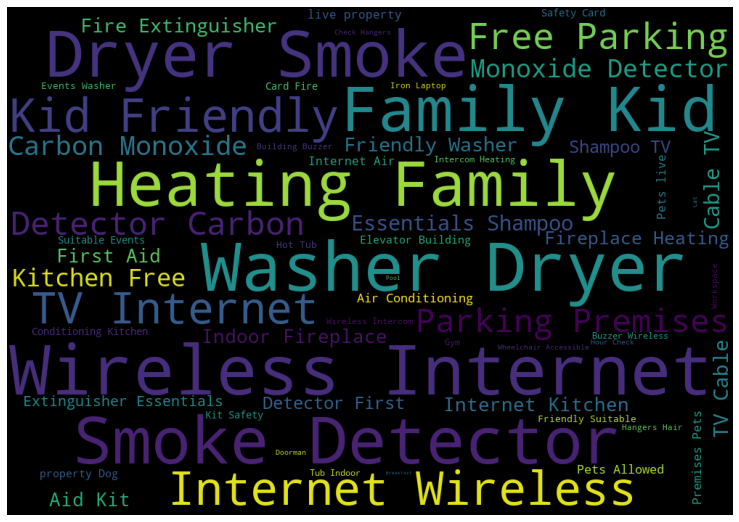

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="black").generate(allemenities_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## The relationship between Top and Low performer hosts

In [52]:
### IMPORT USEFUL PACKAGES ###
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Some helper functions to make our plots cleaner with Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
%matplotlib inline

def correction(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)    
    return (x)

def correction2(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

def to_int(x):
    '''
    Columns value corrections
    '''
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)

def changeTime(x):
    '''
    change host_response_time columns from string into numerical.
    '''
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'
        
    return x


def changeStr(x):
    '''
    change back the host_response_time from the numerical into strings
    '''
    if x == 1:
        x='within an hour'
    elif x == 4:
        x='within a few hours'
    elif x == 24:
        x='within a day'
    elif x == 48:
        x= 'a few days or more'
    elif x == 96:
        x= 'Not Response'
        
    return x

def createAmenities(x):
    '''
    Convert the Amenities column into more analytical words
    '''
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    return val


def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value


'''
    ### VIZ FUNCTIONS ###
    this functions actually using the functions from
    https://www.kaggle.com/andresionek/what-makes-a-kaggler-valuable/notebook
'''

def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return xaxis


def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return yaxis


def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )


def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars


def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations


def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

In [53]:
### import files ###

csvs = glob.glob('listings.csv')
base= pd.read_csv(csvs[0])
listings_df= base.copy()
listings_df.head(2)

    ### create a new metrics ###

listings_df['new_score_reviews2'] = listings_df['reviews_per_month'] * listings_df['review_scores_rating']
listings_df['new_score_reviews2'].fillna(0, inplace = True)

In [55]:
'''
the definition and print the value.
'''
top90flag = listings_df['new_score_reviews2'].quantile(0.9)
upto25flag = listings_df['new_score_reviews2'].quantile(0.25)

listings_df['top90'] = listings_df.new_score_reviews2 >= top90flag
listings_df['upto25'] = listings_df.new_score_reviews2 <= upto25flag

In [56]:
#some useless columns: url, and unique value all of the rows. 
unique_value_columns=[]
url_columns=[]

for i in listings_df.columns:
    
    if len((listings_df[i]).unique())==1:
        print ('a un-used column because same value:', i, (listings_df[i]).unique())
        unique_value_columns=unique_value_columns+[i]
    if 'url' in i:
        url_columns=url_columns+[i]
        
# url columns.
# print ('\n''url columns:\n\n', url_columns)
# unique value columns.
# print ('\n''unique value columns:\n\n', unique_value_columns)

# Drop it.
listings_df = listings_df.drop(url_columns+unique_value_columns, axis = 1)

a un-used column because same value: scrape_id [20160104002432]
a un-used column because same value: last_scraped ['2016-01-04']
a un-used column because same value: experiences_offered ['none']
a un-used column because same value: market ['Seattle']
a un-used column because same value: country_code ['US']
a un-used column because same value: country ['United States']
a un-used column because same value: has_availability ['t']
a un-used column because same value: calendar_last_scraped ['2016-01-04']
a un-used column because same value: requires_license ['f']
a un-used column because same value: license [nan]
a un-used column because same value: jurisdiction_names ['WASHINGTON']


In [57]:
# Change the string of boolean (t / f) into int of boolean (1/0)
for i in listings_df.columns:
    
    if set(listings_df[i])=={'t','f'}:
        listings_df[i]=listings_df[i].apply(to_int)
        
    elif set(listings_df[i]) == {'t','f',np.nan}:
        listings_df[i]=listings_df[i].apply(to_int)
        
# Dollar corrections.
listings_df['price']=listings_df['price'].map(lambda x: correction(x))
listings_df['weekly_price'] = listings_df['weekly_price'].map(lambda x: correction(x))
listings_df['monthly_price'] = listings_df['monthly_price'].map(lambda x: correction(x))
listings_df['security_deposit'] = listings_df['security_deposit'].map(lambda x: correction(x))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].map(lambda x: correction(x))
listings_df['extra_people'] = listings_df['extra_people'].map(lambda x: correction(x))

# Change the rate percentage.
listings_df['host_response_rate'] = listings_df['host_response_rate'].fillna('0%').apply(correction2)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].fillna('0%').apply(correction2)

# Change time indicators
listings_df['host_response_time'] = listings_df['host_response_time'].apply(changeTime).astype(int)

# Amenities change into reproduceable column.
listings_df['amenities']= base['amenities']
listings_df['array_amenities'] = listings_df['amenities'].apply(lambda x: createAmenities(x))
listings_df['len_amenities'] = listings_df['amenities'].apply(lambda x: len(createAmenities(x)))

# filling some null value.
listings_df['security_deposit'].fillna(0, inplace = True)
listings_df['cleaning_fee'].fillna(0, inplace = True)

# Pick onlly the relevant columns
# relevant_columns = list(listings_df.columns)

# Some irrelevant columns personally
irrelevant_colmuns = ['id','host_id','host_listings_count','host_total_listings_count','latitude','longitude','is_location_exact','square_feet','price','weekly_price','monthly_price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','require_guest_profile_picture','require_guest_phone_verification']
relevant_df = listings_df.drop(irrelevant_colmuns, axis = 1)

# pick only numerical columns
# listings_df= listings_df.select_dtypes(np.number)

Text(0.5, 1.0, 'Figure 3')

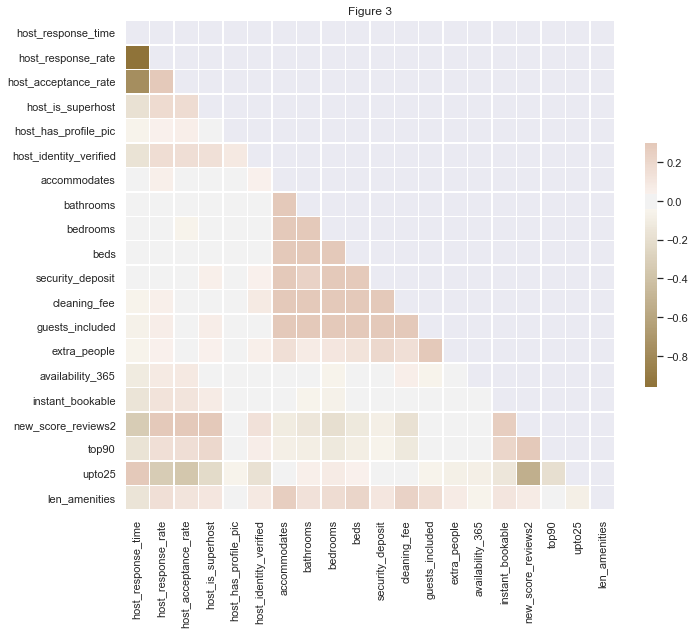

In [58]:
# Compute the correlation matrix 'top90', 'upto25', .drop(['scrape_id', 'license'], axis=1)
corr = relevant_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(420, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Figure 3")

In [59]:
### defide them into 2 dataframe class ###

top_listings = listings_df[listings_df['new_score_reviews2'] >= np.percentile(listings_df['new_score_reviews2'],90)]
low_listings = listings_df[listings_df['new_score_reviews2'] <= np.percentile(listings_df['new_score_reviews2'],25)]

### Host Acceptance Rate DataFrame ###

hostAR_top_performer = pd.DataFrame(top_listings['host_acceptance_rate'].reset_index(drop = True))
hostAR_top_performer['status'] = 'Top Performer'

hostAR_low_performer = pd.DataFrame(low_listings['host_acceptance_rate'].reset_index(drop = True))
hostAR_low_performer['status'] = 'Low Performer'

hostAR = hostAR_low_performer.append(hostAR_top_performer).sample(frac=1)

### Identity verified.

identify_verified_top = pd.DataFrame(top_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_top['status'] = 'Top Performer'

identify_verified_low = pd.DataFrame(low_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_low['status'] = 'Low Performer'

identify_verified = identify_verified_low.append(identify_verified_top).sample(frac=1)

### Host is Superhost DataFrame

superhost_top_performer = pd.DataFrame(top_listings['host_is_superhost'].reset_index(drop = True))
superhost_top_performer['status'] = 'Top Performer'

superhost_low_performer = pd.DataFrame(low_listings['host_is_superhost'].reset_index(drop = True))
superhost_low_performer['status'] = 'Low Performer'

superhost = superhost_top_performer.append(superhost_low_performer).sample(frac=1)

### instant bookable

instantBookable_top_performer = pd.DataFrame(top_listings['instant_bookable'].reset_index(drop = True))
instantBookable_top_performer['status'] = 'Top Performer'

instantBookable_low_performer = pd.DataFrame(low_listings['instant_bookable'].reset_index(drop = True))
instantBookable_low_performer['status'] = 'Low Performer'

host_bookable = instantBookable_low_performer.append(instantBookable_top_performer).sample(frac=1)

### Host response Rate.

top_listings['host_response_time_str'] = top_listings['host_response_time'].apply(changeStr)
low_listings['host_response_time_str'] = low_listings['host_response_time'].apply(changeStr)

host_response_top = pd.DataFrame(top_listings['host_response_time_str'].reset_index(drop = True))
host_response_top['status'] = 'Top Performer'

host_response_low = pd.DataFrame(low_listings['host_response_time_str'].reset_index(drop = True))
host_response_low['status'] = 'Low Performer'

host_response = host_response_low.append(host_response_top).sample(frac=1)

### **Host Response time.**

host_responserate_top_performer = pd.DataFrame(top_listings['host_response_rate'].reset_index(drop = True))
host_responserate_top_performer['status'] = 'Top Performer'

host_responserate_low_performer = pd.DataFrame(low_listings['host_response_rate'].reset_index(drop = True))
host_responserate_low_performer['status'] = 'Low Performer'

host_responserate = host_responserate_low_performer.append(host_responserate_top_performer).sample(frac=1)
# ---
percentage_low = list(host_responserate[host_responserate['status'] == 'Low Performer']['host_response_rate'].unique())
percentage_low.sort(reverse = True)
percentage_top = list(host_responserate[host_responserate['status'] == 'Top Performer']['host_response_rate'].unique())
percentage_top.sort(reverse = True)
host_responserate_fig = host_responserate[host_responserate['host_response_rate'].isin([1.0, 0.99, 0.96, 0.95, 0.94, 0.0])]

### collecting data into one array ###
data= []
data.append(hostAR)
data.append(identify_verified)
data.append(superhost)
data.append(host_bookable)
data.append(host_response)
data.append(host_responserate_fig)

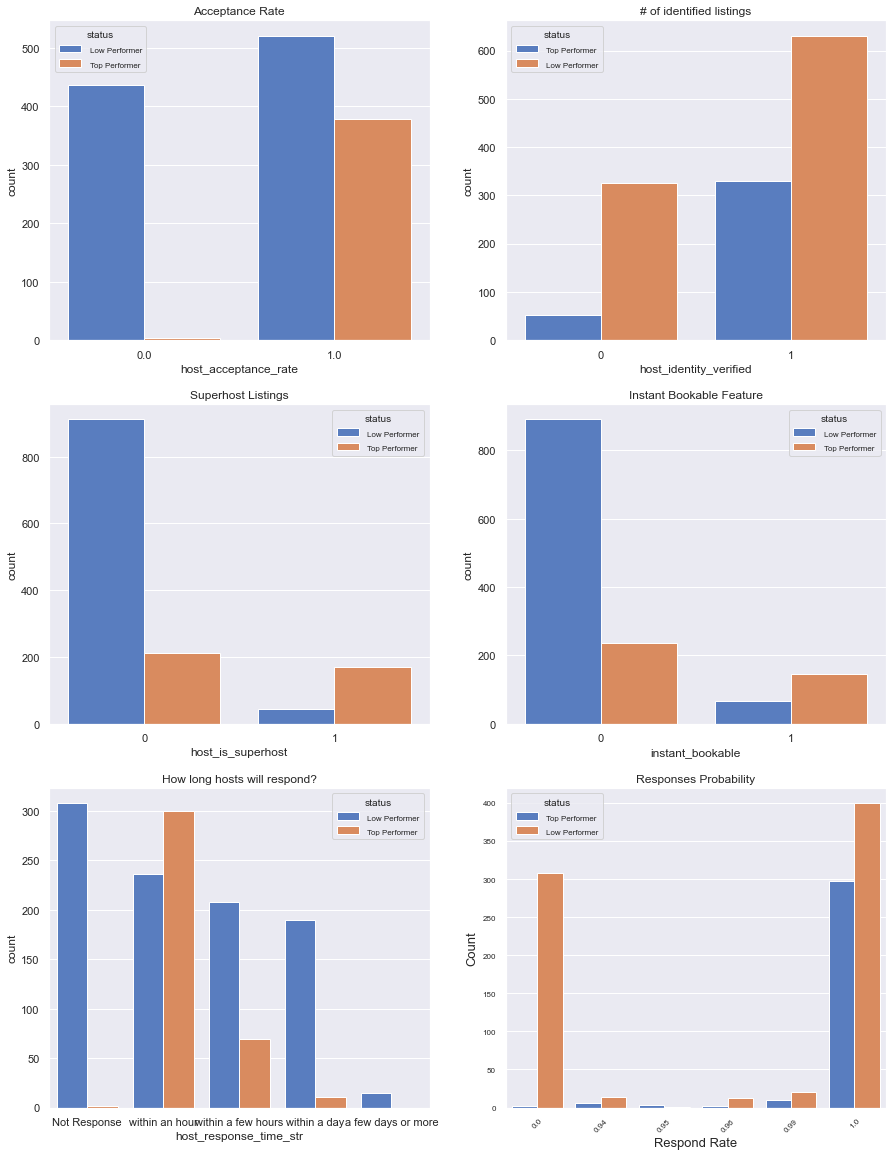

In [60]:
### Vis ###

fig, ax = plt.subplots(figsize=(15,20), nrows=3, ncols=2)
x_data= ['host_acceptance_rate','host_identity_verified','host_is_superhost','instant_bookable','host_response_time_str','host_response_rate']
title= ['Acceptance Rate','# of identified listings','Superhost Listings', 'Instant Bookable Feature', 'How long hosts will respond?' , 'Responses Probability']

x_axis= ['Percentage','Activate/Not','True/Not','Activate/Not', 'Respond Time', 'Respond Rate']
y_axis= ['Count']
cnt=0

for x in range(3):
    for y in range(2):
        
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette='muted', orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8') # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10') # for legend title
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.xlabel(x_axis[cnt], fontsize=13)
        p=plt.ylabel(y_axis[0], fontsize=13)
        
        cnt+=1